# Bidirectional and gene transcription levels

This notebook plots summaries of gene and bidirectional transcripts based in the normalized transcription levels. In summary, we show that gene transcripts have higher transcription levels compared to bidirectional transcripts.

# Load libraries

In [1]:
library(data.table) ## load files into R faster
library(ggplot2) ##plotting package
library(cowplot) ##plots + arrange plots etc

# Import summary of normalized counts

In [2]:
gene_all_bidir_tpm_filtered_summary <- data.table::fread('/scratch/Shares/dowell/rutendo/projects/DBNascent_Analysis/data/counts/normalized/gene_bidir_tpm_summary_allBidirs_filteredSamples.tsv.gz')
print(paste("Number of transcripts : ", nrow(gene_all_bidir_tpm_filtered_summary)))
print(colnames(gene_all_bidir_tpm_filtered_summary))
head(gene_all_bidir_tpm_filtered_summary, 3)

[1] "Number of transcripts :  876410"
 [1] "chrom"               "start"               "stop"               
 [4] "gene_transcript"     "score"               "strand"             
 [7] "length"              "stdev"               "variance"           
[10] "sum"                 "mean"                "median"             
[13] "coefvar"             "max"                 "min"                
[16] "num_transcribed"     "percent_transcribed" "transcript_type"    


chrom,start,stop,gene_transcript,score,strand,length,stdev,variance,sum,mean,median,coefvar,max,min,num_transcribed,percent_transcribed,transcript_type
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
chr1,12623,14409,DDX11L1:NR_046018.2,.,+,1787,0.07209929,0.005198307,6.760542,0.009002053,0.0000000,8.0092052,1.252323,0,29,3.861518,genes
chr1,14361,28620,WASH7P:NR_024540.1,.,-,14260,0.19045740,0.036274023,163.616971,0.217865474,0.1674576,0.8741973,1.587046,0,749,99.733688,genes
chr1,17368,17436,MIR6859-1:NR_106918.1,.,-,69,0.00000000,0.000000000,0.000000,0.000000000,0.0000000,NA,0.000000,0,0,0.000000,genes


# Figure 2A

## Plotting the average expression between genes and bidirectionals

Warning message:
“Removed 5043 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 5043 rows containing non-finite values (stat_boxplot).”


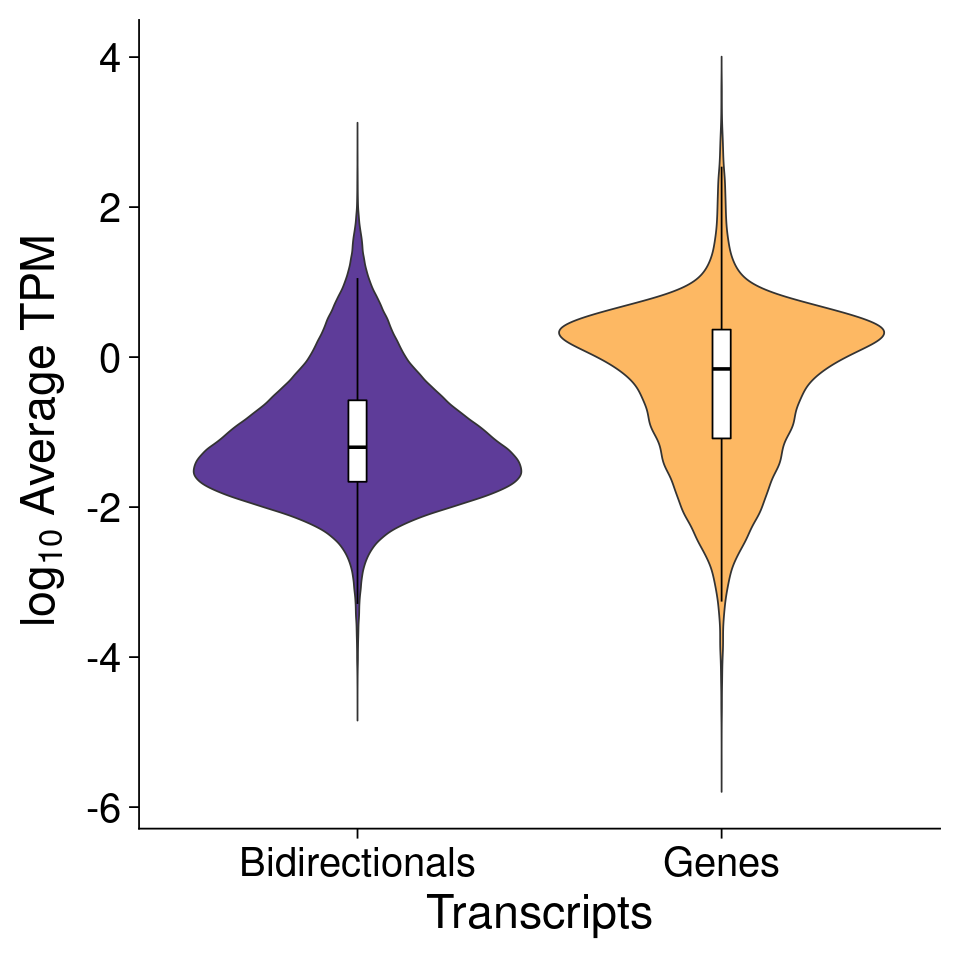

In [3]:
options(repr.plot.width=8, repr.plot.height=8)
mean_tpms <- ggplot(gene_all_bidir_tpm_filtered_summary,
                    aes(x=transcript_type, 
                          y=log(mean, base=10),
                         fill=transcript_type)) + 
    geom_violin(trim=FALSE) +
ylab(expression(paste(log[10]," Average TPM", sep=' ')) )+
xlab('Transcripts') + 
geom_boxplot(width=0.05, 
             fill='white',
             color='black', 
             alpha=1, 
             outlier.size=-1,
             position = position_dodge(0.9)) + 
scale_fill_manual(name=' ',
                  values = c("#5e3c99","#fdb863"),
                 labels = c("Bidirectional","RefSeq")) +
scale_x_discrete(labels=c("bidirectional"="Bidirectionals","genes"="Genes")) +
theme_cowplot(24) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 28), 
      axis.text.x = element_text(size = 24),
      axis.text.y = element_text(size = 24),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24),
     legend.position = "none") 

mean_tpms

In [4]:
ggsave(mean_tpms, width = 8, height = 8,
       filename = "/scratch/Shares/dowell/rutendo/projects/DBNascent_Analysis/figures/hg38_mean_tpms.pdf", 
       bg = "transparent")

ggsave(mean_tpms, width = 8, height = 8,
       filename = "/scratch/Shares/dowell/rutendo/projects/DBNascent_Analysis/figures/hg38_mean_tpms.png", 
       bg = "transparent")

Warning message:
“Removed 5043 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 5043 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 5043 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 5043 rows containing non-finite values (stat_boxplot).”


# Supplement to 2A

## Plotting the CV and mean TPMs

In [5]:
##All transcripts
cv_tpm_all <- ggplot(gene_all_bidir_tpm_filtered_summary, 
       aes(x=log(mean, base=10),
           y=log(coefvar, base=10))) + 
ggtitle("Gene and Bidirectional Transcripts") +
xlab(expression(paste(log[10],' Average TPMs'))) + 
ylab(expression(paste(log[10], ' Coeficient of Variation', sep=""))) +
geom_point(color = 'black',
           fill = 'gray60',
           size = 3,
           shape = 21,
           alpha = 0.05) + 
geom_vline(xintercept = 0, linetype="dotted", 
                color = "gray60", size=1) +
geom_hline(yintercept = 0.5, linetype="dotted", 
                color = "gray60", size=1) +
coord_cartesian(ylim=c(-0.25, 1.5),
               xlim=c(-5, 5)) +
theme_cowplot(24) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 28), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

In [6]:
##gene transcripts
cv_tpm_genes <- ggplot(subset(gene_all_bidir_tpm_filtered_summary,
                              transcript_type=="genes"), 
       aes(x=log(mean, base=10),
           y=log(coefvar, base=10))) + 
ggtitle("Gene Transcripts") +
xlab(expression(paste(log[10],' Average TPMs'))) + 
ylab(expression(paste(log[10], ' Coeficient of Variation', sep=""))) +
geom_point(color = 'gray20',
           fill = '#fdb863',
           size = 3,
           shape = 21,
           alpha = 0.05) +
geom_vline(xintercept = 0, linetype="dotted", 
                color = "gray60", size=1) +
geom_hline(yintercept = 0.5, linetype="dotted", 
                color = "gray60", size=1) +
coord_cartesian(ylim=c(-0.25, 1.5),
               xlim=c(-5, 5)) +
theme_cowplot(24) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 28), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

In [7]:
##Bidirectional transcripts
cv_tpm_bidirs <- ggplot(subset(gene_all_bidir_tpm_filtered_summary,
                               transcript_type=="bidirectional"), 
       aes(x=log(mean, base=10),
           y=log(coefvar, base=10))) + 
ggtitle("Bidirectional Transcripts") +
xlab(expression(paste(log[10],' Average TPMs'))) + 
ylab(expression(paste(log[10], ' Coeficient of Variation', sep=""))) +
geom_point(color = 'gray20',
           fill = '#5e3c99',
           size = 3,
           shape = 21,
           alpha = 0.05) + 
geom_vline(xintercept = 0, linetype="dotted", 
                color = "gray60", size=1) +
geom_hline(yintercept = 0.5, linetype="dotted", 
                color = "gray60", size=1) +
coord_cartesian(ylim=c(-0.25, 1.5),
               xlim=c(-5, 5)) +
theme_cowplot(24) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 28), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

Warning message:
“Removed 5043 rows containing missing values (geom_point).”
Warning message:
“Removed 4778 rows containing missing values (geom_point).”
Warning message:
“Removed 265 rows containing missing values (geom_point).”


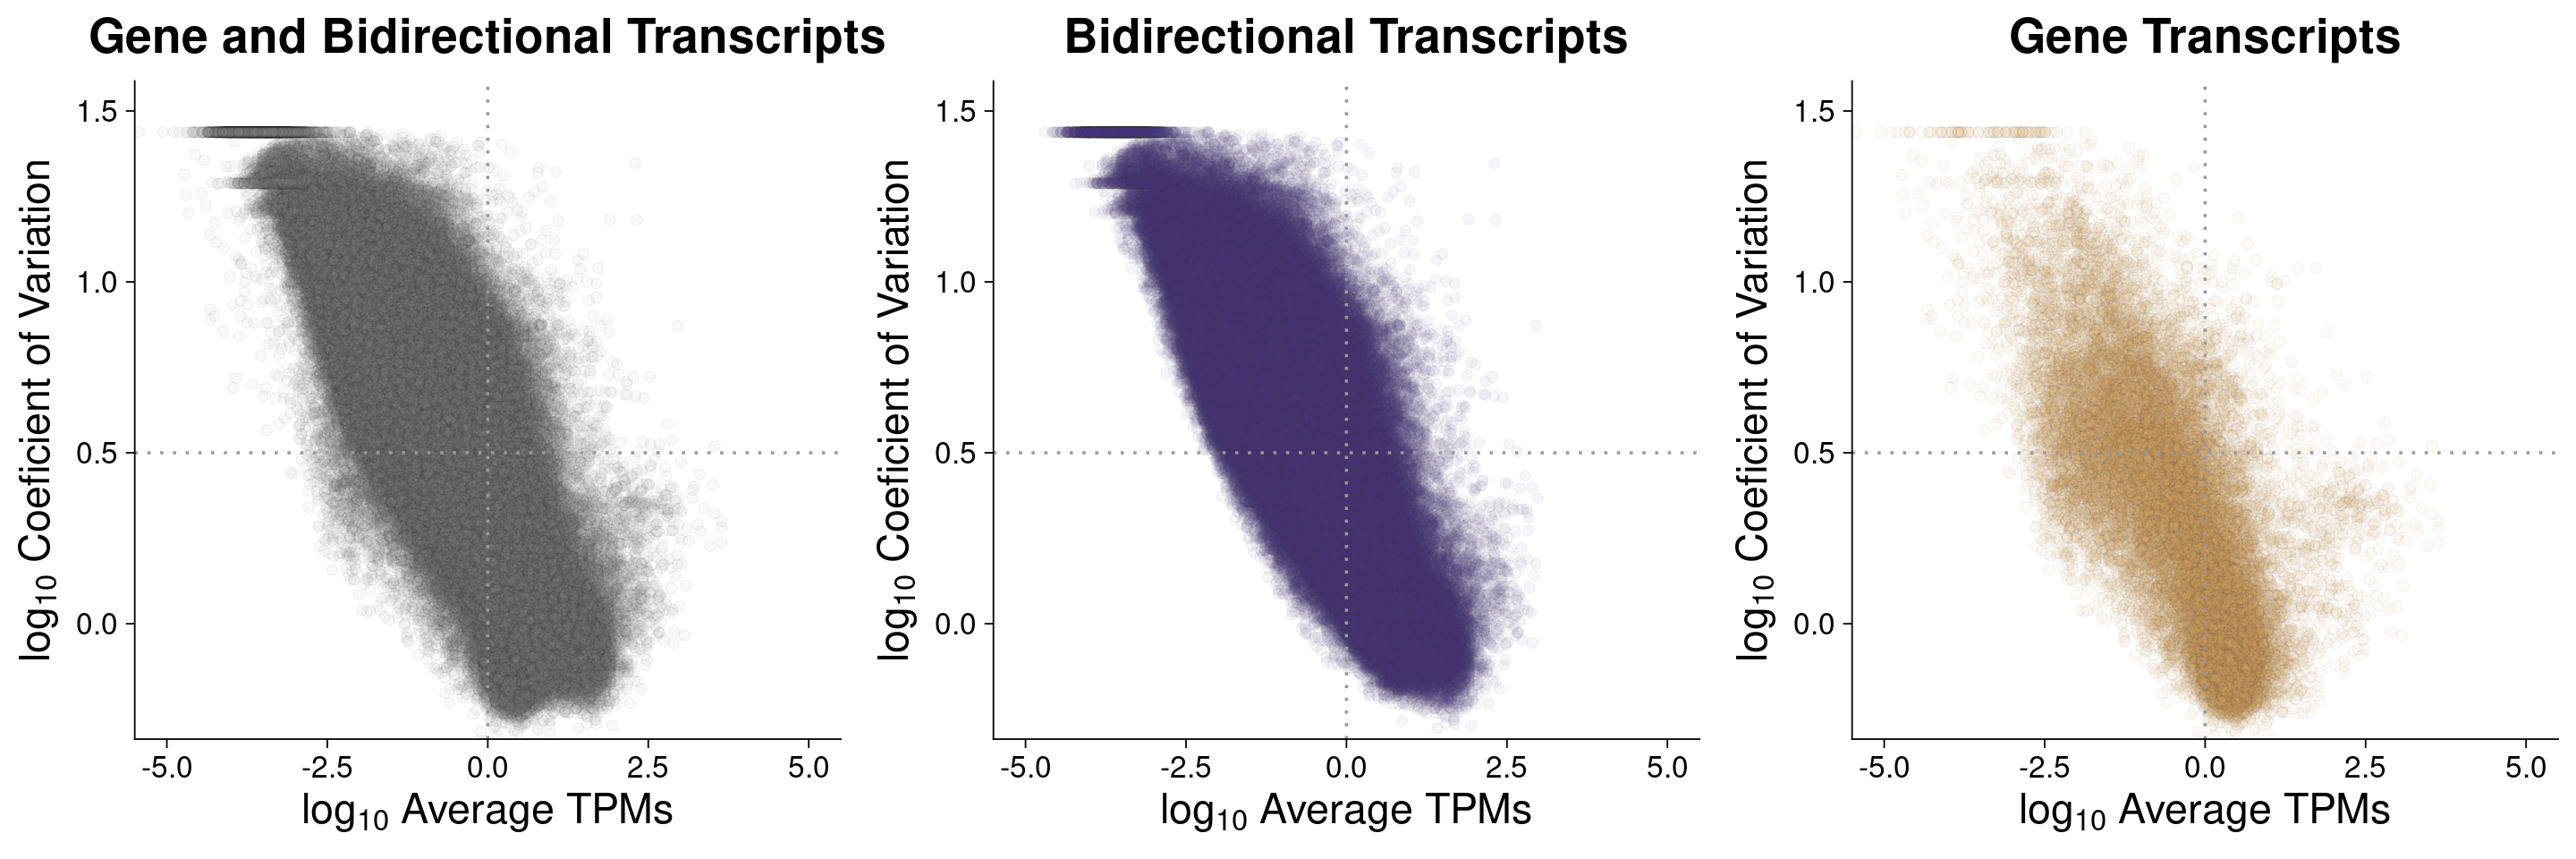

In [8]:
options(repr.plot.width=24, repr.plot.height=8)
cowplot::plot_grid(cv_tpm_all, cv_tpm_bidirs, cv_tpm_genes, nrow=1)

# Session Information

In [9]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1     ggplot2_3.3.6     data.table_1.14.2

loaded via a namespace (and not attached):
 [1] pillar_1.8.1      compiler_3.6.0    R.methodsS3_1.8.2 R.utils_2.12.0   
 [5] base64enc_0.1-3   tools_3.6.0       digest_0.6.29     uuid_1.1-0       
 [9] jsonlite_1.8.0    evaluate_0.16     lifecycle_1.0.3   tibble_3.1.8     
[1